In [1]:
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram

import random


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import networkx as nx
from IPython.display import Video
import plotly
from plotly.graph_objs import graph_objs as go
import ipywidgets as widgets


import teaspoon.MakeData.PointCloud as makePtCloud
import teaspoon.TDA.Draw as Draw

from ripser import ripser
from persim import plot_diagrams
from simplicial import *

from simplicial import SimplicialComplex

import gudhi
import simplicial

# Algunos de las metodos para generar figuras

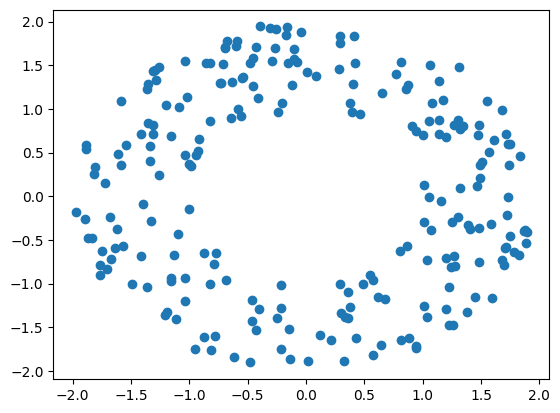

In [ ]:
r = 1 #radio interno
R = 2 #radio externo
puntos = makePtCloud.Annulus(N=230, r=r, R=R, seed=None)
plt.scatter(puntos[:,0],puntos[:,1])


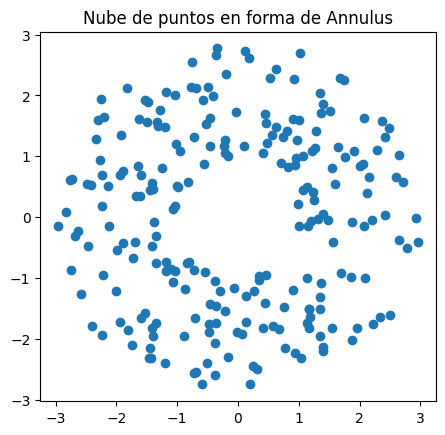

In [ ]:
  def generate_torus(N, r, R, seed=None):
    np.random.seed(seed)

    # Generar ángulos aleatorios entre 0 y 2π
    theta = np.random.uniform(0, 2 * np.pi, N)

    # Generar radios uniformemente distribuidos entre r y R
    radii = np.random.uniform(r, R, N)

    # Convertir coordenadas polares a coordenadas cartesianas
    x = radii * np.cos(theta)
    y = radii * np.sin(theta)

    return np.c_[x, y]

toro = generate_torus(230, 1, 3)

# Visualizar el annulus
plt.scatter(toro[:, 0], toro[:, 1])
plt.title('Nube de puntos en forma de Annulus')
plt.gca().set_aspect('equal', 'box')

# Complejos simpliciales

In [ ]:
def creando_complejo(nube, dimension, distancia):       #----------------El parametro "nube" se refiere al conjunto de datos con el que se está trabajando
    # Validar si "distancia" está dentro del rango
    if not isinstance(distancia, (int, float)) or not (0 <= distancia <= 1):
        raise ValueError("La distancia debe ser un número entre 0 y 1.")

    # Validar si 'dimension' es un número entero positivo
    if not isinstance(dimension, int) or dimension < 0:
        raise ValueError("La dimensión debe ser un número entero positivo.")

    # Validar si 'nube' es una lista o array de puntos
    if not isinstance(nube, (list, tuple)) and not hasattr(nube, 'shape'):
        raise ValueError("La nube de puntos debe ser un array o lista de puntos.")

    # Validar si 'nube' contiene al menos dos puntos
    if len(nube) < 2:
        raise ValueError("La nube de puntos debe contener al menos dos puntos.")

    # Creando Complejo
    rips_complex = gudhi.RipsComplex(points=nube, max_edge_length=distancia)
    # Creando Árbol de Símplices
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=dimension)

    # Definir un rango para recorrer dimensiones
    for dim in range(dimension + 1):
        # Obtener los símplices de la dimensión actual
        simplices = simplex_tree.get_skeleton(dim)

        if dim == 0:
# Calcular el número de n-símplices
            num_simplices = len(list(simplices))
        else:
            num_simplices = len(list(simplices)) - len(list(simplex_tree.get_skeleton(dim-1)))

        # Imprimir el número de n-símplices
        print(f"Número de {dim}-símplices: {num_simplices}")


La anterior función crea el complejo simplicial de vietoris rips, el cual une puntos cuando estos esten a una distancia menor al parametro "distancia".

In [ ]:
creando_complejo(puntos, 2, 0.3)

Número de 0-símplices: 230
Número de 1-símplices: 675
Número de 2-símplices: 863


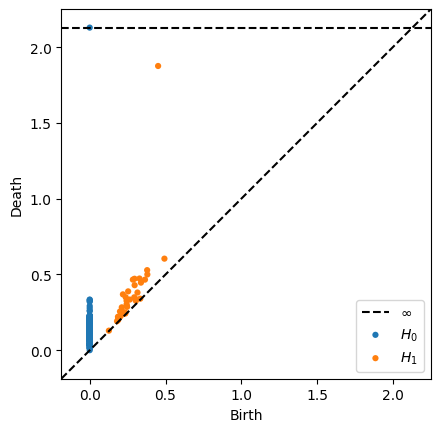

In [ ]:
result = ripser(puntos)
# Obtener los diagramas de persistencia
diagrams = result['dgms']

# Visualizar los diagramas de persistencia
plot_diagrams(diagrams, show=True)

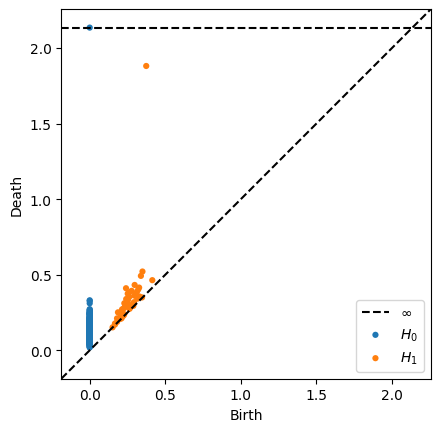

In [ ]:
diagrama = ripser(P)["dgms"]
plot_diagrams(diagrams, show=True)